In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "C:/Users/86152/Desktop/beef and dairy.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,159,China,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,25355.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,159,China,5412,Yield,01371,"Almonds, in shell",2018,2018,kg/ha,3391.8,E,Estimated value,NaN
2,QCL,Crops and livestock products,159,China,5510,Production,01371,"Almonds, in shell",2018,2018,t,86000.0,X,Figure from international organizations,NaN
3,QCL,Crops and livestock products,159,China,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,26110.0,E,Estimated value,NaN
4,QCL,Crops and livestock products,159,China,5412,Yield,01371,"Almonds, in shell",2019,2019,kg/ha,3446.9,E,Estimated value,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3124 non-null   object 
 1   Domain            3124 non-null   object 
 2   Area Code (M49)   3124 non-null   int64  
 3   Area              3124 non-null   object 
 4   Element Code      3124 non-null   int64  
 5   Element           3124 non-null   object 
 6   Item Code (CPC)   3124 non-null   object 
 7   Item              3124 non-null   object 
 8   Year Code         3124 non-null   int64  
 9   Year              3124 non-null   int64  
 10  Unit              3124 non-null   object 
 11  Value             3056 non-null   float64
 12  Flag              3124 non-null   object 
 13  Flag Description  3124 non-null   object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(4), object(9)
memory usage: 366.2+ KB


In [9]:
items_of_interest = ['Meat of cattle with the bone, fresh or chilled', 'Raw milk of cattle']

In [11]:
df_selected = df[(df['Item'].isin(items_of_interest)) & (df['Element'] == 'Production')]

In [13]:
df_grouped = df_selected.groupby(['Year', 'Item'])['Value'].sum().reset_index()

In [15]:
carbon_factors = {
    'Meat of cattle with the bone, fresh or chilled': 20.5,
    'Raw milk of cattle': 1.6
}
df_grouped['Carbon_Factor'] = df_grouped['Item'].map(carbon_factors)

In [17]:
df_grouped['Emissions (tonnes CO2e)'] = df_grouped['Value'] * df_grouped['Carbon_Factor']

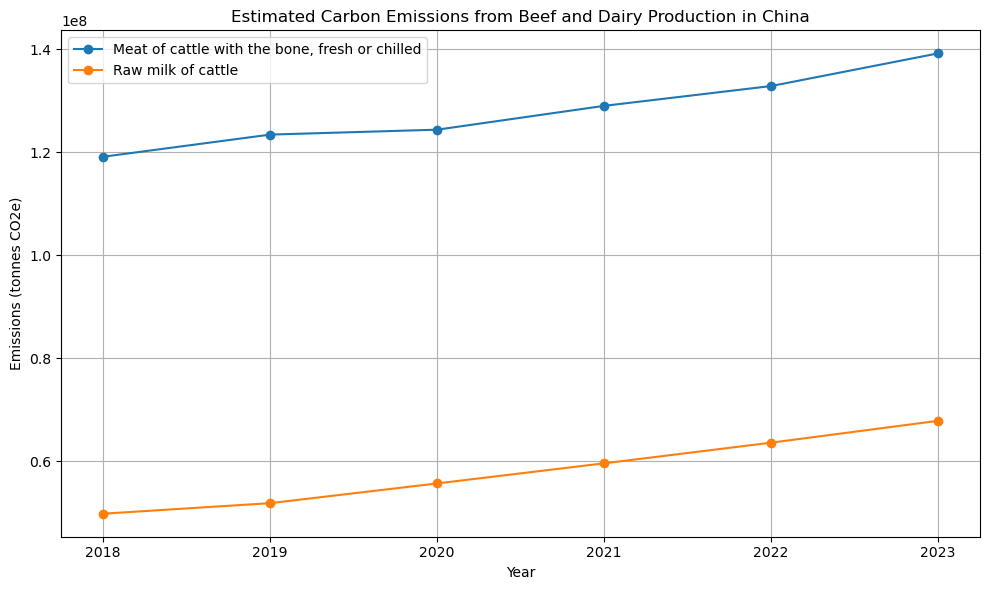

In [19]:
plt.figure(figsize=(10, 6))
for item in items_of_interest:
    sub = df_grouped[df_grouped['Item'] == item]
    plt.plot(sub['Year'], sub['Emissions (tonnes CO2e)'], marker='o', label=item)

plt.title('Estimated Carbon Emissions from Beef and Dairy Production in China')
plt.xlabel('Year')
plt.ylabel('Emissions (tonnes CO2e)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
import seaborn as sns

In [22]:
sns.set(style="whitegrid")

In [23]:
data = {
    'Item': ['Meat of cattle with the bone, fresh or chilled', 'Raw milk of cattle'],
    'Emissions (tonnes CO2e)': [139171408.14, 67890496.0],
    'Emissions per tonne (kg CO2e/kg)': [20500.0, 1600.0]
}
df_2023 = pd.DataFrame(data)

In [24]:
 labels = df_2023['Item'].values
total_emissions = df_2023['Emissions (tonnes CO2e)'].values
unit_emissions = df_2023['Emissions per tonne (kg CO2e/kg)'].values

C:\Users\86152\AppData\Local\Temp\ipykernel_57048\4162716273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=unit_emissions, y=labels, palette="Reds_d")


Text(0.5, 1.0, 'Share of Total Carbon Emissions - 2023')

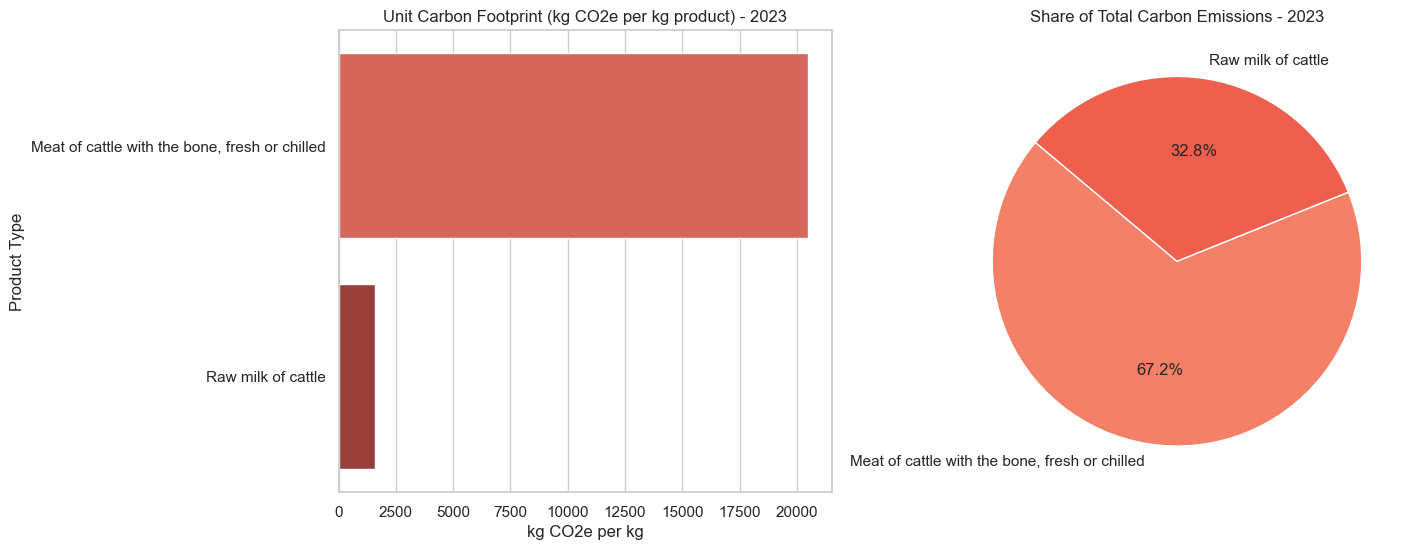

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(ax=axes[0], x=unit_emissions, y=labels, palette="Reds_d")
axes[0].set_title("Unit Carbon Footprint (kg CO2e per kg product) - 2023", fontsize=12)
axes[0].set_xlabel("kg CO2e per kg")
axes[0].set_ylabel("Product Type")
axes[1].pie(total_emissions, labels=labels, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette("Reds_d"))
axes[1].set_title("Share of Total Carbon Emissions - 2023", fontsize=12)

In [30]:
plt.suptitle("Beef vs Dairy Carbon Emissions in China (2023)", fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

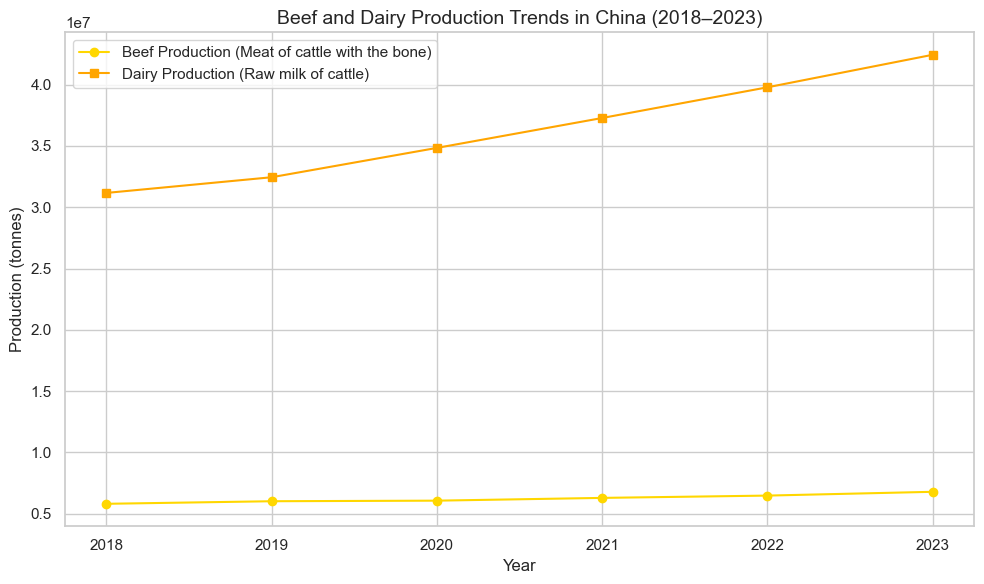

In [39]:
items_of_interest = ['Meat of cattle with the bone, fresh or chilled', 'Raw milk of cattle']

production_data = df[(df['Area'] == 'China') & 
                       (df['Element'] == 'Production') & 
                       (df['Item'].isin(items_of_interest))]

# 3. 分开牛肉和乳制品的数据
beef_data = production_data[production_data['Item'] == 'Meat of cattle with the bone, fresh or chilled']
milk_data = production_data[production_data['Item'] == 'Raw milk of cattle']

# 4. 提取年份和产量
beef_years = beef_data['Year']
beef_production = beef_data['Value']

milk_years = milk_data['Year']
milk_production = milk_data['Value']

# 5. 绘制折线图
plt.figure(figsize=(10,6))
plt.plot(beef_years, beef_production, marker='o', color='gold', label='Beef Production (Meat of cattle with the bone)')
plt.plot(milk_years, milk_production, marker='s', color='orange', label='Dairy Production (Raw milk of cattle)')

# 图表美化
plt.title('Beef and Dairy Production Trends in China (2018–2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production (tonnes)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 6. 展示图表
plt.show()